In [80]:
from typing import List, Tuple

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

$\newcommand{\xv}{\mathbf{x}}
 \newcommand{\wv}{\mathbf{w}}
 \newcommand{\yv}{\mathbf{y}}
 \newcommand{\zv}{\mathbf{z}}
 \newcommand{\uv}{\mathbf{u}}
 \newcommand{\vv}{\mathbf{v}}
 \newcommand{\tv}{\mathbf{t}}
  \newcommand{\bv}{\mathbf{b}}
 \newcommand{\Chi}{\mathcal{X}}
 \newcommand{\R}{\rm I\!R}
 \newcommand{\sign}{\text{sign}}
 \newcommand{\Tm}{\mathbf{T}}
 \newcommand{\Xm}{\mathbf{X}}
 \newcommand{\Zm}{\mathbf{Z}}
 \newcommand{\Im}{\mathbf{I}}
 \newcommand{\Um}{\mathbf{U}}
 \newcommand{\Vm}{\mathbf{V}} 
 \newcommand{\muv}{\boldsymbol\mu}
 \newcommand{\Sigmav}{\boldsymbol\Sigma}
 \newcommand{\Lambdav}{\boldsymbol\Lambda}
$

# Naive Bayes


## Table of notation

| Symbol                     | Meaning                     | Symbol    | Meaning                                                          |
|----------------------------|-----------------------------|-----------|------------------------------------------------------------------|
| $\xv$ or $\vec{x}$         | feature/input vector        | $x_i$     | $i$th element of $\xv$                                           |
| $\Xm$                      | input matrix                | $x_{i,j}$ | $i$th row and $j$th column of $\Xm$                              |
| $\yv$ or $\tv$             | labels/targets              | $n$       | number of features or columns 
| $\wv$ or $\mathbf{\theta}$ | weight/parameter vector     | $m$       | number of data samples <br>(also used to refer to the slope) |samples or rows                                   |
| $f$ or $h$                 | hypothesis function <br> (i.e., a model)        | $\hat{\yv}$ <br> $f(\xv {;} \wv)$<br>$h(\xv {;} \wv)$ | predictions <br> y-hat |
| $E$              | error or sum of error (loss)  | $SSE$      | sum of squared error function                                            |
| $MSE$                      | mean squared error| $\nabla$  | gradient (nabla)                                       |
| $\partial$                 | partial derivative          | $\alpha$  | learning rate (alpha)                                  |       
| $J$ | general placeholder for <br>the objective function | $x^T$| transpose of a vector or matrix |
$b$ | bias or y-intercept term | $T$ | Threshold |
$*$| element-wise<br> multiplication | $\cdot$ | dot product|
| $z$<br>$\zv$| value before applying activation function |  $X, Y$ | Random variables |
| $K$| number/set of classes | $k$ | current class|
| $MAP$|  maximum a posteriori | $ML$ |  maximum likelihood|


## Review
Before we dive into Naive Bayes we first need to review the fundamentals of probability theory. As we'll see shortly, Naive Bayes takes these fundamentals and creates a simple and elegant algorithm.

### Probability theory
First, recall the following foundational terms.

#### **Random variables**: X and Y
Here $X$ and $Y$ will be <u>two different [random variables](https://www.khanacademy.org/math/statistics-probability/random-variables-stats-library/random-variables-discrete/v/random-variables?modal=1)</u>. In classical probability theory. Further, depending on the domain/field, the following could be other ways to write the random variables $X$ and $Y$: 

$$
X = B = E \\
Y = A = H
$$

*Note, $X$ and $Y$ here DO NOT refer to matrices!*

#### **Marginal probability**: P(X) or P(Y)
$P(X)$ is read as the *probability of $X$ occurring* while $P(Y)$ is read as the probability of $Y$ occurring. When we are interested in the probability of a <u>single random event occurring irrespective of the outcome of another variable</u> we refer to this as the marginal probability. Thus, we want just the probability of $X$ or just the probability of $Y$ occurring.

#### **Joint probability**: P(X, Y)
$P(X, Y)$ is read as *the probability of $X$ and $Y$*. $P(X, Y)$ can also be written $P(X \cap Y)$ or $P(X \land Y)$. Joint probability simply refers to when we are interested in probability of <u>two or more events occurring simultaneously</u>. Thus, we want the probability $X$ and $Y$ occur at the same time.

#### **Conditional probability**: P(Y | X)
$P(Y \mid X)$ is read as the *probability of $Y$ given $X$*. When we are interested in the <u>probability of $Y$ occurring **given** $X$ has already occurred</u>, we refer to this as the conditional probability. Meaning, we are interested in the probability of $Y$ conditioned on $X$.

#### **Product rule** or chain rule 
The product rules is defined as follows:
$$
P(X, Y) = P(Y \mid X) P (X) = P(X | Y) P (Y)
$$

The product rule relates the joint and conditional probabilities and provides us with a way of computing the joint or conditional probability if one is not given. Notice that the product rule is symmetrical, meaning we can swap the places $X$ and $Y$ and achieve the same answer $P(Y \mid X) P (X) = P(X | Y) P (Y)$.

#### **Independence rule**
When we assume our random variables are independent from one another, meaning $X$ does not influence the outcome of $Y$ and vice-versa, the following can be said about the our conditional and joint probabilities:

- **Conditional**: $P(Y \mid X) = P(Y)$
    - If $Y$ is independent of $X$ then when given $X$, the probability of $Y$ occurring is unchanged or simply just the marginal of $Y$. The same idea is applied to the reverse $P(X \mid Y) = P(X)$.
    
- **Joint**: $P(X, Y) = P(X) P(Y)$
    - When $X$ and $Y$ are independent the joint probability is simply the two probabilities multiplied. Notice, assuming independence means we simplify the product rule simply to $P(X)P(Y)$.
    
<!-- *Note, it is assumed we multiply the probabilities when no operator is given.* -->

## Probabilistic classification

With these fundamental probability definitions in mind, let's reformulate our classification problem using conditional probability $P(Y \mid X)$.

Recall $\Xm$ contains our input features with $m$ data samples and $n$ features. Further, for each data sample $\xv$, there is a corresponding label $y$. Thus, we'll say $X = \xv$ and $Y = y$.

We can formulate **our classification problem** as the probability of a label $y$ given a single data sample $\xv$. Recall, this **is just a conditional probability** that can be written as follows:
$$
P(y \mid \xv).
$$

Now, recall we typically have multiple classes and therefore multiple labels such that we have $K$ classes $\{1, 2, ..., k\}$. This means we want to predict/compute the probability for EACH class. Thus, we compute the probability that a data sample $\xv$ belongs to a given class $y_k$ where $k$ is simply a placeholder for the current class. We can write the following instead:

$$
P(y_k \mid \xv), \textrm{ or}\quad P(y = k\mid \xv)
$$
where in this equation
- $P(y_k \mid \xv)$ is the probability of class $y_k$ given the current data sample $\xv$. If we had 3 classes $K=3$ we would need to compute $P(y_k \mid \xv)$ for EACH class! See the below example.
    - Probability of class 1:  $P(y_1 \mid \xv)$ 
    - Probability of class 2:  $P(y_2 \mid \xv)$ 
    - Probability of class 3:  $P(y_3 \mid \xv)$ 

To select the predicted label for each data sample, we simply select the class label with **largest probability**. This can be written mathematically as follows:

$$
\hat{y} = \arg \max_{k \in K} P(Y=y_k \mid X=\xv)
$$


where in this equation
- $K$ is the set of classes or number of class. For instance, if we had 3 classes then $K$ would contain the set $K \in \{1,2,3\}$
- $\arg \max$, in general terms, refers to the point that maximizes a given function. In relation to our problem, $\arg \max$ refers to selecting the **label** for the class that has the highest probability.
    - $\arg \max_{k \in K}$ indicates we want to compute the $\arg \max$ over all the possible classes. <u>This means $\hat{y} $ would be the label corresponding to the class with the largest probability</u>. For instance, if our labels were {0,1,2\}, $\hat{y}$  could only take on ONE of the labels from the set such that $\hat{y} \in$  \{0,1,2\}.

# Naive Bayes classifier

Given these probability fundamentals and the formulation of probabilistic classification we are ready to tackle Naive Bayes. Our goal will be to find what we call the posterior probability $P(Y = y_k \mid X = \xv)$ for each of the $K$ classes. However, directly computing the posterior probability from the training data isn't possible. All hope isn't lost, we can actually approximate the posterior probability using Bayes rule! Let's take a look at how to derive Bayes rule.

## Bayes rule

Recall that Bayes rules is given as follows:
$$
P(Y \mid X)  = \frac{P(X \mid Y) P(Y)}{P(X)}
$$

How did we get here though? We'll, we can simply use the definitions of joint and conditional probability to derive Bayes rule.

First, recall that the joint probability definition is symmetrical such that the following is true:
$$
P(Y, X) = P(X, Y). 
$$

Additionally, we can write the joint probability using the product rule, which is also symmetrical, as follows:
$$
\begin{align}
P(Y, X) = P(Y \mid X) P(X), \\
P(X, Y) = P(X \mid Y) P(Y). 
\end{align}
$$

Now, if we substitute the product rule into the symmetrical joint distribution definition given above we get the following:

$$
P(Y \mid X) P(X) = P(X \mid Y) P(Y)
$$

Thus, if we move $P(X)$ to the right hand side of the equation (by dividing) we get Bayes rule as follows:

$$
P(Y \mid X)  = \frac{P(X \mid Y) P(Y)}{P(X)}
$$

where the following terms are used.
- $P(Y \mid X)$ is referred to as the *posterior*
    - Recall, in practice, the posterior is the probability of a label given our data. This is what we want to find!
- $P(X \mid Y)$ is referred to as the *likelihood*
    - Likelihood is slightly less intuitive. It refers to the *likelihood* a data sample belongs to a label. It is common practice to refer to the likelihood as the probability although this is technically incorrect as the likelihood is not a probability as its value is not constrained between 0 and 1. More on this soon.
- $P(Y)$ is referred to as the *prior*
    - The prior simply refers to the distribution of our labels or what is the probability of each label occurring. This is easily computed from the training data.
- $P(X \mid Y) P (Y)$ is often referred to as the *joint likelihood*
- $P(X)$ is referred to as the *evidence*
    - Evidence refers to the distribution over our data or the probability of data occurring. As we'll see shortly, the evidence acts as a normalization term and turns the joint likelihood into an actual probability. More on this term soon!

The below picture depicts these same terms. Here $A=Y$ and $X=B$.
<img src="https://miro.medium.com/max/1400/1*CnoTGGO7XeUpUMeXDrIfvA.png" width=300 height=300>



## Naive Bayes assumption
The big assumption that Naive Bayes makes is called *conditional independence*. Before explaining what this term means, let's see how we would compute $P(\xv | y_k)$ first. 

Recall that $\xv$ contains $n$ features meaning $P(\xv | y_k) = P(x_1, x_2, ..., x_n | y_k)$. Thus, we would have to compute the probability of a feature $x_i$ given a particular label $y_k$ and combinations of the other features. For instance, imagine we have 3 features, to compute  $P(\xv | y_k)$ we would have to do the following:
$$
\begin{align}
P(x_1, x_2, x_3 | y_k) = & P(x_1|x_2,x_3,y_k) P(x_1| x_2, y_k) P(x_1| x_3, y_k) \\ 
& P(x_2 | x_1, x_3, y_k) P(x_2|x_1,y_k) P(x_2|x_3,y_k) \\
& P(x_3|x_1,x_2,y_k) P(x_3 | x_1, y_k) P(x_3 | x_1, y_k)
\end{align}
$$

However, if we assume our data is conditional independent we only have to compute the following:

$$
P(x_1, x_2, x_3 | y_k) = P(x_1|y_k) P(x_2|y_k) P(x_3 | y_k)
$$

Recall that **conditional independence** means that our data features are independent of each other only when conditioned on $y$. Now **this assumption is not usually actually true, however it greatly simplifies the math**. While this assumption isn't always true and often limits Naive Bayes, results produced by Naive Bayes can still be surprisingly good.

**Naive Bayes is referred to as *naive* due to this conditional independence assumption**. In more general terms, for data with $n$ features we can compute $P(\xv | y_k)$ as follows:

$$
\begin{align}
P(\xv | y_k) &= P(x_1|y_k) P(x_2|y_k) ... P(x_n|y_k) \\
&= \prod_{i=0}^n P(x_i|y_k)
\end{align}
$$

where is this equation
- $\prod$ (referred to as the upper case Greek symbol Pi)is the [product symbol](https://mathmaine.com/2018/03/04/pi-notation/) taken over all $n$ features in our data.
- $i$ is used to index each of the $n$ features. 

##  Probabilistic Classification with MAP and ML
Recall, our goal is to maximize the following equation where $\hat{y}$ contains the label of the class with the highest probability:

$$
\hat{y} = \arg \max_{k \in K} P(Y=y_k \mid X=\xv).
$$

Further, recall that Bayes rule defines how we can compute $P(Y=y_k \mid X=\xv)$ such that we can substitute Bayes rule into our maximization equation:

$$
\hat{y} = \arg \max_{k \in K} \frac{P(\xv \mid y_k) P(y_k)}{P(\xv)}
$$

### Temporally dropping the evidence P(X)

In practice, we typically drop the denominator $P(X)$ when computing the predictions. In turn, this leaves us with the following equation:

$$
P(Y \mid X)  = P(X \mid Y) P(Y)
$$

In other words, we have: 
$$
\hat{y} = \arg \max_{k \in K} P(\xv \mid y_k) P(y_k)
$$

==== Following are explanations, you may skip if not interested in. =======

We can drop the denominator $P(X)$ because it acts as a constant. This is because it does not depend on a given class, rather $P(X)$ is based on the sum of ALL classes which means the term never changes (i.e., a constant). This term is also computationally expensive to compute so excluding it can lead to major performance increases as well.

If we wanted to compute $P(X)$ we would use the following equation:
$$
P(X) = \sum_{k=1}^K P(X | Y= y_k)P(Y = y_k).
$$

Notice how this equation is the same no matter which class we use since the sum is always over ALL classes!

Finally, for some more intuition for $P(X)$, below is the Bayes rule with the expanded equation of $P(X)$.

$$
\begin{align}
P(Y \mid X) &= \frac{P(X | Y)P(Y)}{P(X)} \\
&= \frac{P(X | Y = y_k)P(Y = y_k)}{\sum_{k=1}^K P(X | Y= y_k)P(Y = y_k)}
\end{align}
$$

Notice, how the numerator and denominator are almost the same, except the denominator has a summation over ALL classes! This is because $P(X)$ acts as a normalizing term. Recall the numerator is for a specific class $k$ and the denominator is for all classes! 

Remember how the denominator $P(X)$ computes the distribution over our data? This means our numerator computes the distribution over our data for a given class and the denominator computes the distribution over our data for ALL classes! If we left $P(X)$ in Bayes rule, it would convert the product in the numerator into an actual probability (more on this soon).


### Maximum a posteriori (MAP)

After dropping $P(\xv)$, as this term is a constant, this leaves us with an equation we refer to as the *maximum a posteriori* (MAP). MAP is given as follows:

$$
\begin{align}
\hat{y}_{MAP} &=  \arg \max_{k \in K} P(y_k) \prod_{i=0}^n P(x_i|y_k) \\
&= \arg \max_{k \in K} P(\xv \mid y_k) P(y_k)
\end{align}
$$

Notice, we are making a prediction based on the largest joint likelihood now!

### Maximum likelihood (ML)

Lastly, we can drop $P(y_k)$ if we assume all the classes are equally likely to be picked. In other words, we assume there are equal number of data samples for each class such that $P(y)$ for all classes is a uniform distribution. This means, all class priors are the same! In turn, $P(y_k)$ then becomes constant and we can drop it from the equation! 

Finally, after dropping both $P(\xv)$ and $P(y_k)$, this leaves us with an equation we refer to as the *maximum likelihood* (ML). ML is given as follows:
$$
\begin{align}
\hat{y}_{ML} &= \arg \max_{k \in K} \prod_{i=0}^n P(x_i|y_k) \\
&= \arg \max_{k \in K} P(\xv \mid y_k)
\end{align}
$$

Notice, we are making a prediction based on the largest likelihood now!

### Differences between MAP and ML

The main differences between MAP and ML is that *MAP assumes some prior evidence while ML does not*. Which is better? Well, it is hard to say which is truly better. However, we can say that when given enough data MAP and ML tend to perform the same. Thus, it can be more efficient to use ML. Further, *if we have very little data, MAP can perform better as it allows us to inject our prior knowledge or beliefs into the equation*. That being said, if our prior beliefs are wrong, MAP can perform worse than ML.

### More efficient MAP and ML equations
You might be wondering at this point. Hey, there is a product term $\prod$ in both the MAP and ML equations. Isn't this an issue as computing the product over small numbers can lead to numerical instability such as [underflow](https://www.computerhope.com/jargon/u/underflo.htm)?

The answer is yes, this is an issue. The solution to this is actually extremely simple and it requires using our good friend the $\log$.

Recall that taking the log of a product converts said product to a sum. For instance, if we have $f = a * b$ and we take the $\log$ of $f$ we get the following: 

$$
\log(f) = \log(a*b) = \log(a) + \log(b).
$$ 

Further, if we take the $\log$ of a product $\prod$ we get a sum $\sum$.

#### Log maximum a posteriori (MAP)
Applying the log to MAP gives us the following equation:
$$
\begin{align}
\hat{y}_{MAP} &=  \arg \max_{k \in K} \log P(y_k) + \sum_{i=0}^n \log P(x_i|y_k) \\
&=  \arg \max_{k \in K} \log P(\xv \mid y_k) + \log P(y_k).
\end{align}
$$


#### Log maximum likelihood  (ML)
Applying the log to ML gives us the following equation:
$$
\begin{align}
\hat{y}_{ML} &= \arg \max_{k \in K} \sum_{i=0}^n \log P(x_i|y_k) \\
&= \arg \max_{k \in K} \log P(\xv \mid y_k).
\end{align}
$$

### Goal
**Our goal for Naive Bayes is to make predictions using either the $\log$ of the MAP or ML equations, <u>however we'll focus on MAP.</u>** For Naive Bayes this means we need to simply compute the $P(\xv \mid y_k)$ and $P(y_k)$ from our training data and then apply the $\log$. Now, to compute these terms there are multiple ways for doing. For this module, we are going to look at how to do so using Gaussian Naive Bayes. 

*Note, in the future we'll see algorithms that use a variation of ML as a cost function (for those interested I'm referring to cross-entropy and the negative log likelihood)!*

# Gaussian Naive Bayes

Gaussian Naive Bayes aims to expand Naive Bayes to work with continuous features. Typically, [classical Naive Bayes](https://scikit-learn.org/stable/modules/naive_bayes.html#categorical-naive-bayes) (also called Categorical Naive Bayes) computes the likelihood $P(\xv \mid y_k)$ for each feature in a class by counting the frequency of unique values (i.e., categories) and dividing by the total number of values seen for said feature. Notice, that is impossible for continuous features since almost all the values for the continuous feature will be unique. Therefore, classical Naive Bayes can only be used on discrete/categorical features. Thus, we need a different approach that works for continuous features.

Gaussian Naive Bayes computes the likelihood $P(\xv \mid y_k)$ by modeling each feature as a Gaussian distribution (i.e., Gaussian Naive Bayes assumes our data follows a Gaussian distribution which may not be true). By doing so, Gaussian Naive Bayes **ONLY** works with continuous features. 

All we need to do to compute the likelihoods $P(\xv \mid y_k)$ is that: for **every class** is we need to **compute the mean and standard deviation** for **every continuous feature**. We do so using the training data only. Once this is done, we can simply pass any data along with the means and standard deviations to the Gaussian equation to compute the likelihoods for all data samples and classes!

Recall, to make a prediction we will use the $\log$ of the MAP equation given previously! That being said, keep in mind that when the priors $P(y_k)$ are equal for all classes, MAP essentially reduces to a scaled version ML. We can compute the priors $P(y_k)$ for each class by computing the ratio of data samples per class divided by the total number of data samples. 

Let's take a deeper look at how to compute the $\log$ of $P(\xv \mid y_k)$ and $P(y_k)$.

### Toy Data

Before we get started we need to define some toy data. We do so using Sklearn's `make_circles()` function which makes non-linear data that consists of 2 class, an outer circle class (class 0, label 0) and inner circle class (class 1, label 1).

X shape: (100, 2)
y shape: (100,)


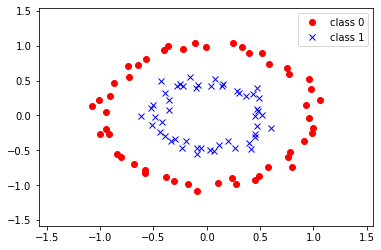

In [81]:
from sklearn.datasets import make_circles

def nonlinear_data(
    n_samples: int = 100, 
    balance: List = None,
    seed: int = 42
) -> List[np.ndarray]:
    X, y = make_circles(random_state=seed, factor=.5, noise=.05)
    
    classes = np.unique(y)
    
    # Create imbalanced data by selecting only a
    # subset of the actual data samples for each class
    if balance is not None:
        rng = np.random.RandomState(seed)
        new_X = []
        new_y = []
        for idx, c in enumerate(classes):
            class_locations = np.where(y == c)[0]
            selected_samples = int(len(X)*balance[idx])
            subsample_locs = rng.choice(class_locations, selected_samples)
            new_X.append(X[subsample_locs])
            new_y.append(y[subsample_locs])
        X = np.vstack(new_X)
        y = np.hstack(new_y)
    return X, y
    
X, y = nonlinear_data()
print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")

# Find data samples for each class
class_0 = np.where(y == 0)[0]
class_1 = np.where(y == 1)[0]

# Plot data
plt.plot(X[class_0, 0], X[class_0, 1], 'or', label='class 0')
plt.plot(X[class_1, 0], X[class_1, 1], 'xb', label='class 1')
plt.xlim([np.min(X[:, 0])-.5, np.max(X[:, 0])+.5])
plt.ylim([np.min(X[:, 1])-.5, np.max(X[:, 1])+.5])
plt.legend()
plt.show();

Below we can see our data is a (100, 2) meaning we have 100 data samples and 2 features.

In [82]:
X

array([[-0.23609814, -0.4675    ],
       [ 0.48869037,  0.24924534],
       [-0.39392915,  0.32374486],
       [ 0.76420024, -0.59338464],
       [ 0.80241569, -0.74074202],
       [ 0.23488158, -0.89596143],
       [-0.90688223,  0.28391018],
       [-0.38816624, -0.29794857],
       [ 0.33240673,  0.98786263],
       [ 0.96101491, -0.04219482],
       [-0.64495068,  0.72223536],
       [-0.80149254, -0.59345631],
       [-0.35261517,  0.0730904 ],
       [-0.57492919, -0.82313077],
       [ 0.19814375, -0.36116696],
       [ 0.95745271,  0.52294033],
       [-0.48140439, -0.0178351 ],
       [-0.51480768, -0.14015324],
       [-0.01133069,  0.98658435],
       [-0.68083656, -0.69503173],
       [ 0.36580635,  0.27590372],
       [ 0.06759942, -0.5118016 ],
       [-0.94961864, -0.19089944],
       [ 0.49231155, -0.86966009],
       [-0.42998185,  0.48945672],
       [-0.36383028,  0.99680073],
       [ 0.27571396, -0.97674589],
       [ 0.45321948, -0.31380268],
       [ 0.39264238,

In [83]:
X.shape

(100, 2)

Next, we can see our labels `y` consist of either the label 0 for class 0 or 1 for class 1.

In [84]:
y

array([1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1])

## Computing priors P(Y)

The first and easiest thing we need to do when computing MAP is to compute the priors $P(y_k)$. To do so, we simply count the number of data samples for each class and divide by the total number of data samples.

We can easily get the unique labels from `y` and the number of data samples for each label (i.e., class) by using NumPy's `np.unique()` function and passing the keyword argument `return_counts=True`.

In [85]:
class_labels, class_count = np.unique(y, return_counts=True)

In [86]:
class_labels

array([0, 1])

In [87]:
class_count

array([50, 50])

Turning this idea into a function can be see below in the `compute_priors()` function. Notice that all we do to compute the priors is divide the `class_count` array by the total number of data samples `total_data_samples`.

In [88]:
def compute_priors(y, verbose=True):
    class_labels, class_count = np.unique(y, return_counts=True)
    total_data_samples = len(y)
    priors = class_count / total_data_samples
    
    if verbose:
        print("Number of samples per class")
        for c, label in enumerate(class_labels):
            print(f"\t Class: {c} Label: {label} Count: {class_count[c]}")
    
    return priors

As we can see, the priors are equal meaning our solution to MAP will just be a scaled version of ML. We say "scaled" because the prior just acts as a constant that scales the value.

In [89]:
X, y = nonlinear_data()

priors = compute_priors(y, verbose=True)
print(f"priors: {priors}")

Number of samples per class
	 Class: 0 Label: 0 Count: 50
	 Class: 1 Label: 1 Count: 50
priors: [0.5 0.5]


 Furthermore, if the classes were not balanced, the priors might look like the below example. Notice, when we only include 50% of the class 0 data, we can see our priors shift and are no longer equal as our data is imbalanced!

In [90]:
imbalanced_X, imbalanced_y = nonlinear_data(balance=[.5, 1])

imbalanced_priors = compute_priors(imbalanced_y, verbose=True)
print(f"imbalanced priors: {imbalanced_priors}")

Number of samples per class
	 Class: 0 Label: 0 Count: 50
	 Class: 1 Label: 1 Count: 100
imbalanced priors: [0.33333333 0.66666667]


## Computing likelihood P(X | Y)

Recall, all we need to do to compute $P(\xv \mid y_k)$ is for **each class**, compute the mean and standard deviation for **every continuous feature**. We do so using the training data only!

### Gaussian distribution

Recall that a [normal or Gaussian distribution](https://machinelearningmastery.com/statistical-data-distributions/) has the parameters $\mu$ (referred to as mu) which represents the mean and $\sigma$ (referred to as sigma) represents the standard deviation. An image of a Gaussian is given below.
 
 
<img src="https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Fupload.wikimedia.org%2Fwikipedia%2Fcommons%2Fthumb%2Fc%2Fc8%2FGaussian_distribution.svg%2F1280px-Gaussian_distribution.svg.png&f=1&nofb=1" width=500 height=500>


The formula for a normal distribution is given as follows:

![](https://wikimedia.org/api/rest_v1/media/math/render/svg/00cb9b2c9b866378626bcfa45c86a6de2f2b2e40)

<!-- $$
f(x) = \frac{1}{\sigma \sqrt{2 \pi}}\exp^{-\frac{1}{2}(\frac{x - \mu}{\sigma})^2}
$$ -->

Thus, in order to compute the likelihood for a given class all we need to do is compute the mean $\mu$ and standard deviation (std) $\sigma$ for each feature. Computing the likelihood for each feature and class is then done by simply plugging in our data $\Xm$. 

Below is the `gaussian_distribution()` function which contains the equation for the Gaussian distribution. A plot is also provided to make sure the `gaussian_distribution()` function works as intended.

The `gaussian_distribution()` will be returning the feature likelihoods which are used to compute the likelihoods for each class as given in the following equation:
$$
\begin{align}
P(\xv | y_k) &= P(x_1|y_k) P(x_2|y_k) ... P(x_n|y_k) \\
&= \prod_{i=0}^n P(x_i|y_k)
\end{align}
$$

In [91]:
def gaussian_distribution(X, mu, sig):
    leading_term =  1 / (sig * np.sqrt(2 * np.pi))
    exponent = -0.5 * ( (X - mu) / sig)**2
    return leading_term * np.exp(exponent)

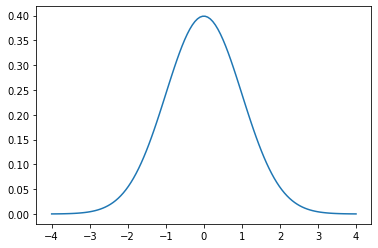

In [92]:
x_values = np.linspace(-4, 4, 120)
y_values = gaussian_distribution(x_values, mu=0, sig=1)
plt.plot(x_values, y_values)
plt.show()

### Computing parameters
Now, onto computing the mean $\mu$ and std $\sigma$. To do so, the function `compute_paramters()` is defined. All this function does is loop over the labels (i.e., classes), find the corresponding data samples for each label, and compute the mean and std for each feature. Here is what is happening.

First, we get all the unique labels (i.e., classes) that are contained in the labels/targets `y` by using the `np.unique()` function.
```Python
class_labels = np.unique(y)
```


We then loop over each unique label found in `class_labels`. 
```Python
for label in class_labels:
```

Within this loop we then find all the data samples for the current label/class using `np.where()`. 

```Python
class_locs = np.where(y == label)[0]
class_X = X[class_locs]
```

Next, using ONLY the current classes data samples, we then compute the mean and std for all features which are stored in `class_X`. Instead of passing one data sample at a time $\xv$, we use ALL the data samples for a given class `class_X`. Lastly, we specify `axis=0` so we get the mean and std for all the features (i.e., columns).

```Python
class_mean = np.mean(class_X, axis=0)
means.append(class_mean)

class_std = np.std(class_X, axis=0)
stds.append(class_std)
```

Lastly, we stack all the means and stds into a NumPy array. Notice we also add what we call a *smoothing* term to the std. Essentially, all this smoothing term does is prevent the std from ever being 0. To do so, we add a small number like .0001 to ALL the computed std values. If we have a std of zero, computing the likelihoods using the Gaussian distribution equation can become numerically unstable and lead to divide by zero errors. You can think about the smoothing term as a hyperparamter that can be adjusted as well.

```Python
means = np.vstack(means)
stds = np.vstack(stds) + smoothing
```

In [93]:
def compute_parameters(X, y, smoothing=10e-5):
    # Find all unique labels for each class
    class_labels = np.unique(y)
    
    means = []
    stds = []
    # Compute means and stds for each class and feature
    for label in class_labels:
        class_locs = np.where(y == label)[0]
        class_X = X[class_locs]
        
        class_mean = np.mean(class_X, axis=0)
        means.append(class_mean)
        
        class_std = np.std(class_X, axis=0)
        stds.append(class_std)
    
    means = np.vstack(means)
    stds = np.vstack(stds) + smoothing
    return means, stds

In [94]:
means, stds = compute_parameters(X, y)

We can see the output of `means` and `stds` is as given below. Notice that the rows correspond to the classes and the columns correspond to the features!

In [95]:
# Means for each feature and class
means_df = pd.DataFrame(means, index=['Class 0', 'Class 1'], columns=["Feature 1", "Feature 2"])
means_df

,Feature 1,Feature 2
Class 0,-0.001266,-0.004266
Class 1,0.006055,0.000297


In [96]:
# stds for each feature and class
stds_df = pd.DataFrame(stds, index=['Class 0', 'Class 1'], columns=["Feature 1", "Feature 2"])
stds_df

,Feature 1,Feature 2
Class 0,0.704095,0.711904
Class 1,0.359206,0.352977


### Computing log likelihoods logP(X | Y)

Next, we need to compute the likelihood $ P(\xv \mid y_k)$ and apply the $\log$ to get $\log P(\xv \mid y_k)$. To do so is more straight forward than it sounds. The below function `compute_log_likelihoods()` does exactly this. Here is how it works.

First, notice the function takes in data `X` along with the `means` and `stds` we computed using `compute_parameters()` function. Using these parameters, the function loops over the mean and std for each class. Recall, that the rows of `means` and `stds` correspond to classes! Each iteration of the loop is then looking at a given class's mean and std.
```Python
for class_mean, class_std in zip(mean, stds):
```

Next, the likelihood for EVERY feature is computed for the current class. This is done by passing **ALL** data samples and the current class's mean and std to the `gaussian_distribution()` function. 

```Python
feature_likelihoods = gaussian_distribution(X, 
                                            mu=class_mean,
                                            sig=class_std)
```

The next line applies the log to each of the feature likelihoods. Recall, this allows us to only have to **SUM** the likelihoods of each feature instead of taking the product between them.
```Python
feature_log_likelihood = np.log(feature_likelihoods)
```

As you might expect, the feature log likelihoods are then summed for all data samples (hence `axis=1` is passed as we want to compress the columns or feature log likelihoods). This computes the log likelihood for the current class for ALL data samples!
```Python
class_log_likelihoods = np.sum(feature_log_likelihood, axis=1)
log_likelihoods.append(class_log_likelihoods)
```

After iterating through all the classes and computing the log likelihoods for all data samples, the  `log_likelihoods` list is then stacked and transformed. The transform `.T` is applied because the shape of `log_likelihoods`, after being vertically stacked, is `(2, 100)` and we want a `(100 , 2)` so that the data samples are the 1st dimension and the classes are the 2nd dimension.
```Python
log_likelihoods = np.vstack(log_likelihoods)
log_likelihoods = log_likelihoods.T
```

In [97]:
def compute_log_likelihoods(X, mean, stds, verbose=False):
    log_likelihoods = []
    for class_mean, class_std in zip(mean, stds):
        # Compute likelihood for every feature uisng all data samples
        feature_likelihoods = gaussian_distribution(X, 
                                                    mu=class_mean,
                                                    sig=class_std)
    
        feature_log_likelihood = np.log(feature_likelihoods)
        
        class_log_likelihoods = np.sum(feature_log_likelihood, axis=1)
        
        log_likelihoods.append(class_log_likelihoods)
        
        if verbose:
            print(f"feature_likelihoods shape: {feature_likelihoods.shape}")
            print(f"feature_log_likelihood shape: {feature_log_likelihood.shape}")
            print(f"class_log_likelihoods shape: {class_log_likelihoods.shape}")
            print("-"*50)
        
    log_likelihoods = np.vstack(log_likelihoods)
    log_likelihoods = log_likelihoods.T
    return log_likelihoods

In [98]:
log_likelihoods = compute_log_likelihoods(X, means, stds, verbose=True)
print(f"log likelihood shape: {log_likelihoods.shape}")

feature_likelihoods shape: (100, 2)
feature_log_likelihood shape: (100, 2)
class_log_likelihoods shape: (100,)
--------------------------------------------------
feature_likelihoods shape: (100, 2)
feature_log_likelihood shape: (100, 2)
class_log_likelihoods shape: (100,)
--------------------------------------------------
log likelihood shape: (100, 2)


Notice that the output is of shape `(100, 2)`. This is because we just computed the log likelihoods $\log P(\Xm \mid y_k)$ for all data samples and classes. Thus, the rows correspond to data samples and the columns correspond to the classes. Each element then corresponds to the log likelihood that a data sample corresponds to a given class $\log P(\xv \mid y_k)$.

Here we can roughly say that the larger the value, the *more likely* a data sample belongs to a particular class. For instance, the first data sample is more likely to belong to class 2. However, because we are using MAP, and not ML, we still need to add our log priors to log likelihoods before we can truly say which class a data sample belongs to.

In [99]:
log_likelihoods_df = pd.DataFrame(log_likelihoods, 
                                  columns=["Class 0", "Class 1"])
log_likelihoods_df

,Class 0,Class 1
0,-1.414546,-0.878092
1,-1.452743,-0.924029
2,-1.408875,-0.812474
3,-2.080584,-3.414450
4,-2.333776,-4.433950
...,...,...
95,-1.374720,-0.667986
96,-1.325194,-0.479945
97,-2.102022,-3.623078
98,-1.423225,-0.881859


## Computing predictions 
To compute the predictions is easy! Recall, we need want to use the log of MAP which is defined as follows:

$$
\arg \max_{k \in K} \log P(\xv \mid y_k) + \log P(y_k)
$$


All that is left is taking the log of the priors `priors`, adding the log priors $\log P(y_k)$ to the log likelihoods $\log P(\xv \mid y_k)$, and taking the $\arg \max_{k \in K}$.

Below we compute the log of the priors by applying the `np.log()` function to `priors` and add the output to `log_likelihoods`.

In [100]:
joint_log_likelihoods = log_likelihoods + np.log(priors)
print(f"joint log likelihood shape: {joint_log_likelihoods.shape}")

joint log likelihood shape: (100, 2)


In [101]:
joint_log_likelihoods_df = pd.DataFrame(joint_log_likelihoods, 
                                        columns=["Class 0", "Class 1"])
joint_log_likelihoods_df

,Class 0,Class 1
0,-2.107693,-1.571240
1,-2.145890,-1.617176
2,-2.102022,-1.505622
3,-2.773731,-4.107598
4,-3.026923,-5.127098
...,...,...
95,-2.067867,-1.361133
96,-2.018341,-1.173092
97,-2.795169,-4.316225
98,-2.116372,-1.575006


Lastly, we just need to take the $\arg \max_{k \in K}$ which can be easily done by using NumPy's `np.argmax()` function. When this function uses `axis=1` it finds the maximum value for each row and returns the **INDEX** for which column contained the largest joint log likelihood. Remember that the columns represents the classes!

In [102]:
class_labels = np.unique(y)
class_labels

array([0, 1])

In [103]:
y_hat = np.argmax(joint_log_likelihoods, axis=1)
y_hat

array([1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1])

Below is a visualization of data and the decision boundaries Gaussian Naive Bayes creates. Notice that the yellow area corresponds to all points that would be predicted as class 1 and the purple area corresponds to all the points that would be predicted as class 0.

As you can see, Naive Bayes can easily handle this non-linear data.

Number of samples per class
	 Class: 0 Label: 0 Count: 50
	 Class: 1 Label: 1 Count: 50


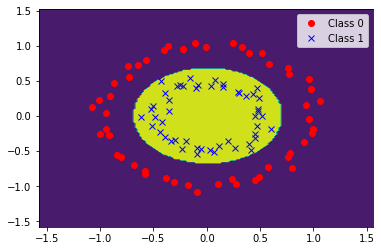

In [104]:
buffer = .5

# Generate fake data to cover entire space
x_min, x_max = X[:, 0].min() - buffer, X[:, 0].max() + buffer
y_min, y_max = X[:, 1].min() - buffer, X[:, 1].max() + buffer
xx, yy = np.meshgrid(np.arange(x_min, x_max, .02),
                     np.arange(y_min, y_max, .02))
fake_data = np.c_[xx.ravel(), yy.ravel()].reshape(-1,2)

# Make prediction
lp = np.log(compute_priors(y))
jll = compute_log_likelihoods(fake_data, means, stds)
bcl = np.argmax(jll+lp, axis=1)
fake_y_hat = class_labels[bcl]

# Plot
plt.contourf(xx, yy, fake_y_hat.reshape(xx.shape))
plt.plot(X[class_0, 0], X[class_0, 1], 'or', label='Class 0')
plt.plot(X[class_1, 0], X[class_1, 1], 'xb', label='Class 1')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.legend()
plt.show()

## Computing probabilities  

Last thing we can do is compute the probability a given data samples belongs to any of the classes in our data. To do so, we have to use the evidence $P(X)$ that we removed earlier. Remember we removed this term as it is not needed UNLESS we want to compute the probabilities!

### Adding back the evidence P(X)
While making a prediction does not require the evidence $P(X = \xv)$, computing the probabilities does. Recall that $P(\xv)$ is the normalizing term that converts $P(\xv \mid y_k) P(y_k)$ into a probability! In order to compute the probability that each data sample belongs a particular class we have to compute $P(X = \xv)$ and divide $P(\xv \mid y_k) P(y_k)$ by it. 

Recall, below is full Naive Bayes equation which computes the probability a given data sample belongs to a specific class.
$$
\begin{align}
P(y_k \mid \xv) &= \frac{P(\xv \mid y_k) P(y_k)}{P(\xv)} \\
&= \frac{(\xv \mid y_k) P(y_k)}{\sum_{k=1}^K P(\xv |y_k)P(y_k)}
\end{align}
$$




To compute the probabilities, notice that we have no logs. Thus, we have to undo the logs we applied to the log likelihoods by using NumPy's `np.exp()`. Recall, `np.log()` uses base $e$ so we can use the exponential function `np.exp()` to undo the $\log$.

In [105]:
joint_likelihoods = np.exp(joint_log_likelihoods)
print(f"joint likelihood shape: {joint_likelihoods.shape}")

joint likelihood shape: (100, 2)


To compute the evidence $P(\xv)$ for a single data sample we sum the likelihoods across all classes. Thus, we use NumPy's `np.sum()` and pass `axis=1` to sum across all the columns (i.e., classes).

In [106]:
evidence = np.sum(joint_likelihoods, axis=1)
print(f"evidence shape BEFORE reshape: {evidence.shape}")
evidence = evidence.reshape(-1, 1)
print(f"evidence shape AFTER reshape: {evidence.shape}")
evidence

evidence shape BEFORE reshape: (100,)
evidence shape AFTER reshape: (100, 1)


array([[0.32930546],
       [0.31542215],
       [0.34408836],
       [0.07887588],
       [0.05439827],
       [0.08888843],
       [0.08194461],
       [0.36588247],
       [0.06202358],
       [0.08049392],
       [0.07710259],
       [0.07127278],
       [0.51256825],
       [0.06995485],
       [0.45653037],
       [0.05404325],
       [0.37539373],
       [0.32213222],
       [0.07290274],
       [0.07671981],
       [0.40848401],
       [0.33845261],
       [0.07766364],
       [0.07135623],
       [0.21870316],
       [0.05860169],
       [0.06807035],
       [0.31191949],
       [0.07476968],
       [0.32845485],
       [0.05883   ],
       [0.07576931],
       [0.29952098],
       [0.08183876],
       [0.23437417],
       [0.07660891],
       [0.34976586],
       [0.28552734],
       [0.07292286],
       [0.06710908],
       [0.06915158],
       [0.07885978],
       [0.08519742],
       [0.34307147],
       [0.06295492],
       [0.06478053],
       [0.40348031],
       [0.084

To compute the probabilities for each data sample we simply divide the `joint_likelihoods` by the `evidence` as is done in the full Naive Bayes equation given above.  Recall, `joint_likelihoods` contains the likelihoods for all the data $\Xm$ which means we can compute the evidence for every data sample at once.

In [107]:
probs = joint_likelihoods / evidence
print(f"probs shape: {probs.shape}")

probs shape: (100, 2)


Below we can see the probability each data sample belongs to a given class.

In [108]:
probs_df = pd.DataFrame(probs, columns=["Class 0", "Class 1"])
probs_df

,Class 0,Class 1
0,0.369013,0.630987
1,0.370817,0.629183
2,0.355168,0.644832
3,0.791479,0.208521
4,0.890920,0.109080
...,...,...
95,0.330321,0.669679
96,0.300430,0.699570
97,0.820694,0.179306
98,0.367870,0.632130
